In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)

import seaborn as sns
from datetime import datetime, timedelta

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy import stats
import statsmodels.api as sm
from itertools import product

import warnings
warnings.filterwarnings('ignore')


/Users/pz/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
bitcoin = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20060812&end=" + 
                                  time.strftime("%Y%m%d"), parse_dates=['Date'], index_col='Date')[0]
bitcoin['price'] = bitcoin['Close']
bitcoin.drop(['Volume', 'Market Cap','Open', 'High', 'Low', 'Close'], axis = 1, inplace = True)
btc = bitcoin.iloc[::-1]

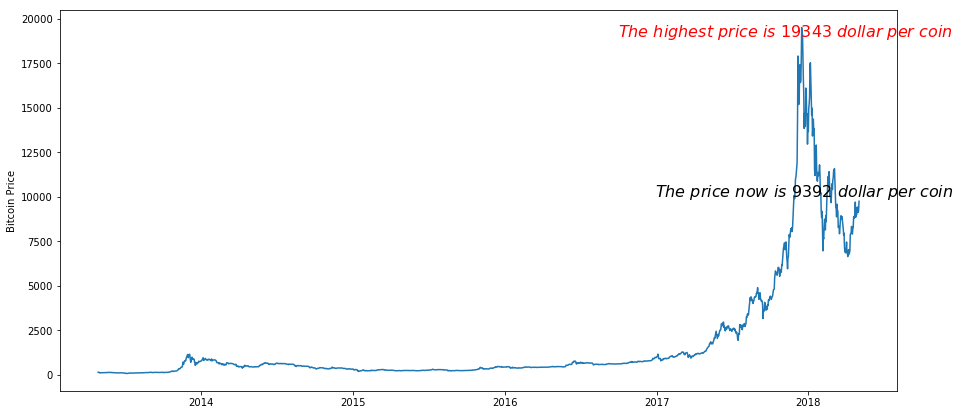

In [4]:
fig, ax1 = plt.subplots(1,1)
ax1.set_ylabel('Bitcoin Price')
plt.plot(btc)

plt.text('2016-10-01', 19000, r'$The\ highest\ price\ is\ 19343\ dollar\ per\ coin$',
         fontdict={'size': 16, 'color': 'r'})

plt.text('2016-12-28', 10000, r'$The\ price\ now\ is\ 9392\ dollar\ per\ coin$',
         fontdict={'size': 16, 'color': 'black'})

plt.show()
fig.savefig("HistoricalDataPrice.png")

In [5]:
btc_month = btc.resample('M').mean()
btc_month.head()

,price
Date,
2013-04-30,139.250000
2013-05-31,119.993226
2013-06-30,107.761333
2013-07-31,90.512258
2013-08-31,113.905161


Dickey–Fuller test: p=0.998396


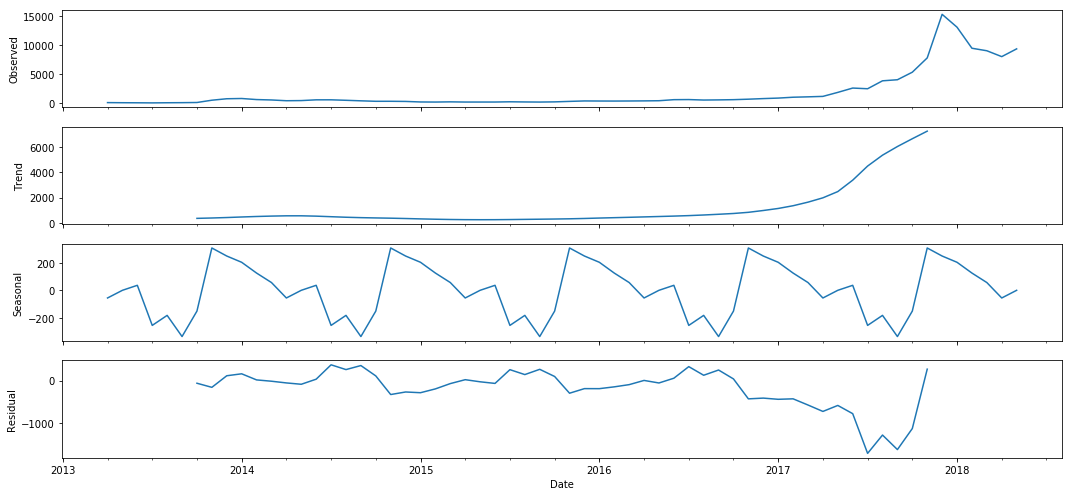

In [6]:
seasonal_decompose(btc_month.price).plot()
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.price)[1])
plt.show()

Use Box-Cox Transformation

In [7]:
# Box-Cox Transformations
btc_month['price_box'], lmbda = stats.boxcox(btc_month.price)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.price_box)[1])

Dickey–Fuller test: p=0.553031


Use Differencing

In [8]:
# Seasonal differentiation (12 months)
btc_month['box_diff_seasonal_12'] = btc_month.price_box - btc_month.price_box.shift(12)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff_seasonal_12[12:])[1])
btc_month.head

Dickey–Fuller test: p=0.621124


<bound method NDFrame.head of                    price  price_box  box_diff_seasonal_12
Date                                                     
2013-04-30    139.250000   2.568902                   NaN
2013-05-31    119.993226   2.534503                   NaN
2013-06-30    107.761333   2.508676                   NaN
2013-07-31     90.512258   2.464954                   NaN
2013-08-31    113.905161   2.522100                   NaN
2013-09-30    130.061667   2.553317                   NaN
2013-10-31    158.311935   2.597341                   NaN
2013-11-30    550.420667   2.823207                   NaN
2013-12-31    800.780968   2.876153                   NaN
2014-01-31    844.168387   2.883137                   NaN
2014-02-28    661.618214   2.849941                   NaN
2014-03-31    592.200323   2.834014                   NaN
2014-04-30    461.362000   2.796133              0.227231
2014-05-31    486.651290   2.804471              0.269968
2014-06-30    615.917333   2.839717       

In [9]:
# Seasonal differentiation (12 months)
btc_month['box_diff_seasonal_3'] = btc_month.price_box - btc_month.price_box.shift(3)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff_seasonal_3[3:])[1])
btc_month.head

Dickey–Fuller test: p=0.011560


<bound method NDFrame.head of                    price  price_box  box_diff_seasonal_12  box_diff_seasonal_3
Date                                                                          
2013-04-30    139.250000   2.568902                   NaN                  NaN
2013-05-31    119.993226   2.534503                   NaN                  NaN
2013-06-30    107.761333   2.508676                   NaN                  NaN
2013-07-31     90.512258   2.464954                   NaN            -0.103948
2013-08-31    113.905161   2.522100                   NaN            -0.012403
2013-09-30    130.061667   2.553317                   NaN             0.044640
2013-10-31    158.311935   2.597341                   NaN             0.132386
2013-11-30    550.420667   2.823207                   NaN             0.301107
2013-12-31    800.780968   2.876153                   NaN             0.322837
2014-01-31    844.168387   2.883137                   NaN             0.285796
2014-02-28    661.6182

In [10]:
# Seasonal differentiation (12 months)
btc_month['box_diff_seasonal_1'] = btc_month.price_box - btc_month.price_box.shift(1)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff_seasonal_1[1:])[1])
btc_month.head

Dickey–Fuller test: p=0.000003


<bound method NDFrame.head of                    price  price_box  box_diff_seasonal_12  \
Date                                                        
2013-04-30    139.250000   2.568902                   NaN   
2013-05-31    119.993226   2.534503                   NaN   
2013-06-30    107.761333   2.508676                   NaN   
2013-07-31     90.512258   2.464954                   NaN   
2013-08-31    113.905161   2.522100                   NaN   
2013-09-30    130.061667   2.553317                   NaN   
2013-10-31    158.311935   2.597341                   NaN   
2013-11-30    550.420667   2.823207                   NaN   
2013-12-31    800.780968   2.876153                   NaN   
2014-01-31    844.168387   2.883137                   NaN   
2014-02-28    661.618214   2.849941                   NaN   
2014-03-31    592.200323   2.834014                   NaN   
2014-04-30    461.362000   2.796133              0.227231   
2014-05-31    486.651290   2.804471              0.2699

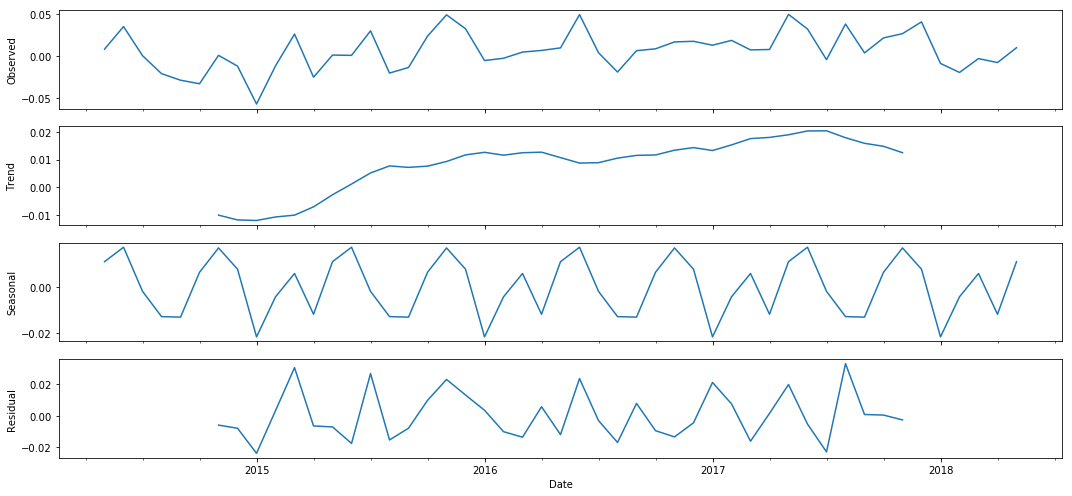

Dickey–Fuller test: p=0.000142


In [11]:
seasonal_decompose(btc_month.box_diff_seasonal_1[13:]).plot()
plt.show()
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff_seasonal_1[13:])[1])

Regular differentiation

Dickey–Fuller test: p=0.032002


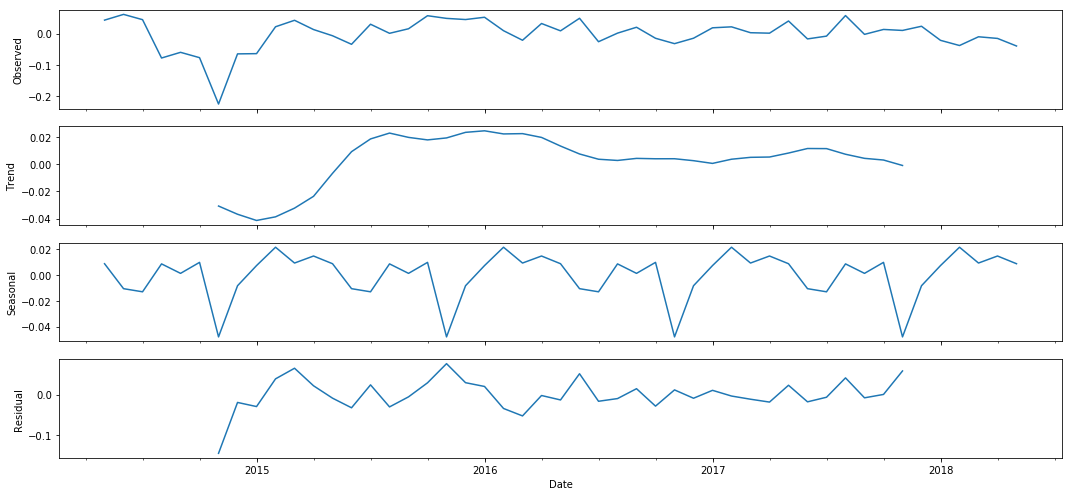

In [12]:
# Regular differentiation
btc_month['box_diff2'] = btc_month.box_diff_seasonal_12 - btc_month.box_diff_seasonal_12.shift(1)

# STL-decomposition
seasonal_decompose(btc_month.box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff2[13:])[1])

plt.show()

acf and pca for diff_season1

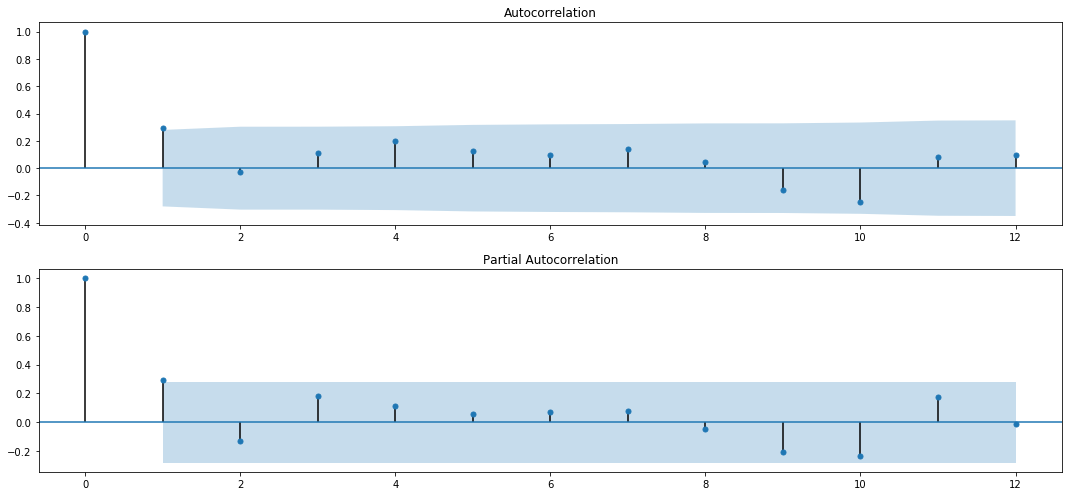

In [13]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
ax = plt.subplot(211)
# Plot the autocorrelation function
#sm.graphics.tsa.plot_acf(btc_month.box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plot_acf(btc_month.box_diff_seasonal_1[13:].values.squeeze(), lags=12, ax=ax)
ax = plt.subplot(212)
#sm.graphics.tsa.plot_pacf(btc_month.box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plot_pacf(btc_month.box_diff_seasonal_1[13:].values.squeeze(), lags=12, ax=ax)
plt.tight_layout()
plt.show()

acf and pca for diff2

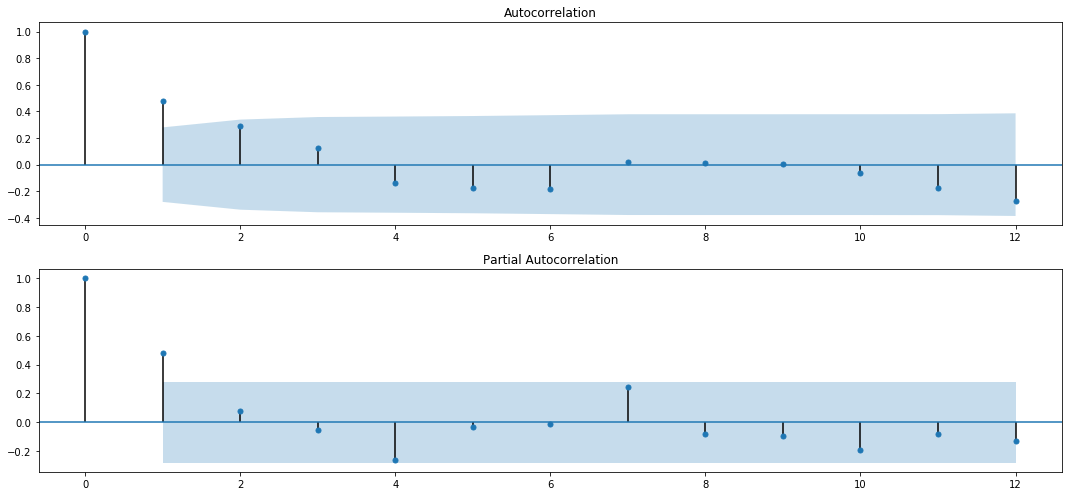

In [14]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
ax = plt.subplot(211)
# Plot the autocorrelation function
#sm.graphics.tsa.plot_acf(btc_month.box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plot_acf(btc_month.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
ax = plt.subplot(212)
#sm.graphics.tsa.plot_pacf(btc_month.box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plot_pacf(btc_month.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
plt.tight_layout()
plt.show()

Result is very similar

Arima Model

In [15]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(btc_month.price_box, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

bad parameter combination: (0, 0)
bad parameter combination: (2, 1)


In [16]:
print(best_model.summary())

                           Statespace Model Results                           
Dep. Variable:              price_box   No. Observations:                   62
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 115.623
Date:                Fri, 04 May 2018   AIC                           -227.246
Time:                        15:05:06   BIC                           -222.992
Sample:                    04-30-2013   HQIC                          -225.576
                         - 05-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3728      0.148      2.526      0.012       0.084       0.662
sigma2         0.0013      0.000     11.691      0.000       0.001       0.002
Ljung-Box (Q):                       20.95   Jarque-

In [17]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

Dickey–Fuller test:: p=0.000000


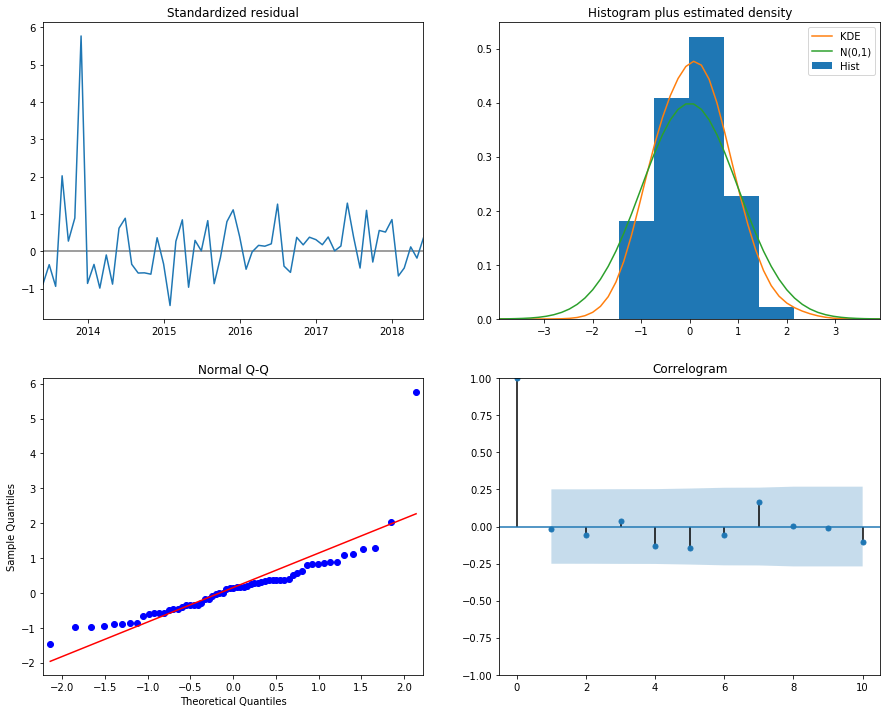

In [18]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

Prediction

In [19]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:

    return(np.exp(np.log(lmbda*y+1)/lmbda))

(p, d, q) is: (1, 1, 0)


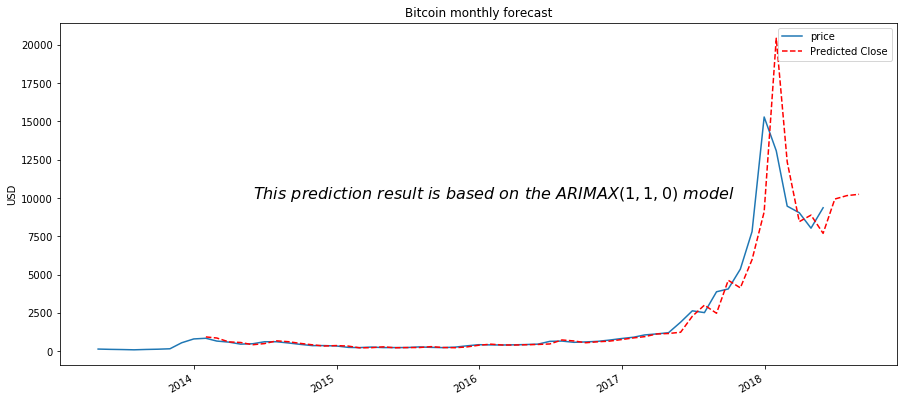

In [20]:
# Prediction
btc_month_pred = btc_month[['price']]
#date_list = [datetime(2018, 3, 31), datetime(2018, 4, 30), datetime(2018, 5, 31), datetime(2018, 6, 30), 
#             datetime(2018, 7, 31), datetime(2018, 8, 31), datetime(2018, 9, 30), datetime(2018, 10, 31),
#             datetime(2018, 11, 30), datetime(2018, 12, 31)]
date_list = [datetime(2018, 5, 31), datetime(2018, 6, 30), 
             datetime(2018, 7, 31), datetime(2018, 8, 31)]
future = pd.DataFrame(index=date_list, columns= btc_month.columns)
btc_month_pred = pd.concat([btc_month_pred, future])
btc_month_pred['forecast'] = invboxcox(best_model.predict(start=datetime(2014, 1, 31), end=datetime(2018, 8, 31)), lmbda)
#btc_month_pred
plt.figure(figsize=(15,7))
btc_month_pred.price.plot()
btc_month_pred.forecast.plot(color='r', ls='--', label='Predicted Close')
plt.legend()
plt.title('Bitcoin monthly forecast')
plt.ylabel('USD')

print ("(p, d, q) is: (1, 1, 0)")

plt.text('2014-06-01', 10000, r'$This\ prediction\ result\ is\ based\ on\ the\ ARIMAX(1,1,0)\ model$',
         fontdict={'size': 16, 'color': 'black'})

btc_month_pred.tail
plt.show()
plt.savefig("ARIMA.png")



In [21]:
btc_month_pred.tail

<bound method NDFrame.tail of            box_diff2 box_diff_seasonal_1 box_diff_seasonal_12  \
2013-04-30       NaN                 NaN                  NaN   
2013-05-31       NaN                 NaN                  NaN   
2013-06-30       NaN                 NaN                  NaN   
2013-07-31       NaN                 NaN                  NaN   
2013-08-31       NaN                 NaN                  NaN   
2013-09-30       NaN                 NaN                  NaN   
2013-10-31       NaN                 NaN                  NaN   
2013-11-30       NaN                 NaN                  NaN   
2013-12-31       NaN                 NaN                  NaN   
2014-01-31       NaN                 NaN                  NaN   
2014-02-28       NaN                 NaN                  NaN   
2014-03-31       NaN                 NaN                  NaN   
2014-04-30       NaN                 NaN                  NaN   
2014-05-31       NaN                 NaN                  Na

summary

during the 5.31 - 8.31 the price of the bitcoin will be comparable stable around 7200 dollar per coin.

## SARIMAX

Select the approximation of parameters

In [22]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(btc_month.price_box, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], 4)).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

bad parameter combination: (0, 0, 0, 0)
bad parameter combination: (2, 1, 0, 0)
bad parameter combination: (2, 1, 0, 1)
bad parameter combination: (2, 1, 1, 0)
bad parameter combination: (2, 1, 1, 1)
bad parameter combination: (2, 1, 2, 0)
bad parameter combination: (2, 1, 2, 1)


In [23]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
20  (1, 0, 1, 1) -200.676611
18  (1, 0, 0, 1) -199.972127
8   (0, 1, 1, 1) -199.692191
22  (1, 0, 2, 1) -199.690118
6   (0, 1, 0, 1) -199.471001
                                 Statespace Model Results                                
Dep. Variable:                         price_box   No. Observations:                   62
Model:             SARIMAX(1, 1, 0)x(1, 1, 1, 4)   Log Likelihood                 104.338
Date:                           Fri, 04 May 2018   AIC                           -200.677
Time:                                   15:07:32   BIC                           -192.168
Sample:                               04-30-2013   HQIC                          -197.336
                                    - 05-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

Dickey–Fuller test:: p=0.000003


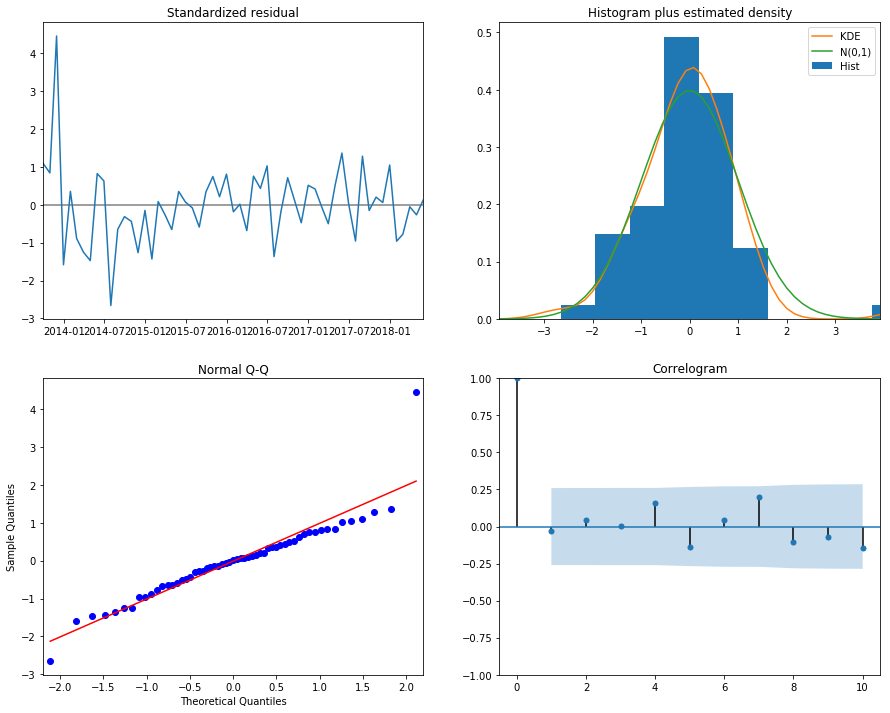

In [24]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

Dickey–Fuller test:: p=0.000003


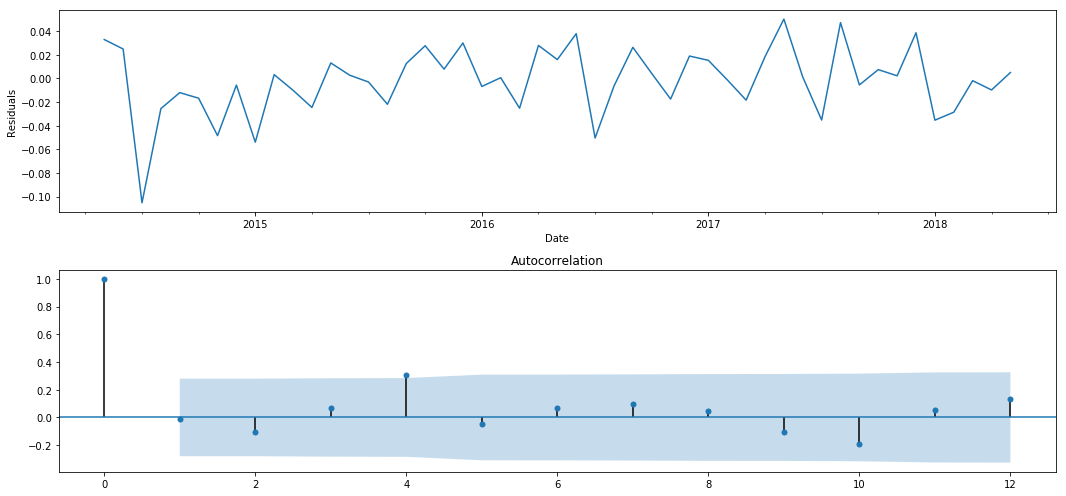

In [25]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
#sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)
plot_acf(best_model.resid[13:].values.squeeze(), lags=12, ax=ax)

print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

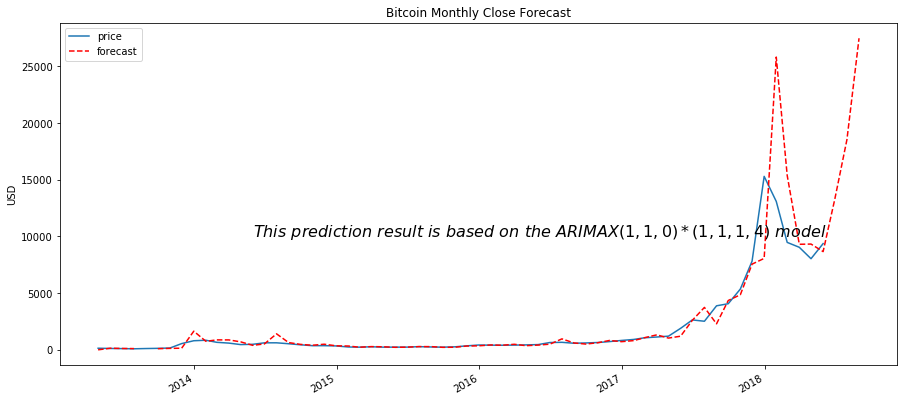

model is: (1, 1, 0) * (1, 1, 1, 4)


In [26]:
# Prediction
btc_month2 = btc_month[['price']]
date_list = [datetime(2018, 5, 31), datetime(2018, 6, 30), 
             datetime(2018, 7, 31), datetime(2018, 8, 31)]
future = pd.DataFrame(index=date_list, columns= btc_month.columns)
btc_month2 = pd.concat([btc_month2, future])

btc_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)

plt.figure(figsize=(15,7))
btc_month2.price.plot()
btc_month2.forecast.plot(color='r', ls='--', label='forecast')
plt.legend()
plt.text('2014-06-01', 10000, r'$This\ prediction\ result\ is\ based\ on\ the\ ARIMAX(1,1,0)*(1,1,1,4)\ model$',
         fontdict={'size': 16, 'color': 'black'})

plt.title('Bitcoin Monthly Close Forecast')
plt.ylabel('USD')
plt.savefig('bitcoin_monthly_forecast.png')
plt.show()
print ("model is: (1, 1, 0) * (1, 1, 1, 4)")

In [29]:
btc_month2.forecast

2013-04-30        1.000000
2013-05-31      139.250001
2013-06-30      119.993226
2013-07-31      107.761333
2013-08-31             NaN
2013-09-30       98.997121
2013-10-31      128.281939
2013-11-30      142.731820
2013-12-31     1643.236006
2014-01-31      750.784836
2014-02-28      876.352241
2014-03-31      873.374899
2014-04-30      703.494192
2014-05-31      395.903733
2014-06-30      520.288714
2014-07-31     1409.532189
2014-08-31      637.924544
2014-09-30      480.370713
2014-10-31      402.585411
2014-11-30      494.056753
2014-12-31      352.578565
2015-01-31      334.936627
2015-02-28      230.239003
2015-03-31      284.045888
2015-04-30      268.131089
2015-05-31      221.478581
2015-06-30      234.637502
2015-07-31      284.181321
2015-08-31      282.014093
2015-09-30      218.893178
                  ...     
2016-04-30      366.343327
2016-05-31      417.902636
2016-06-30      497.551122
2016-07-31      964.816715
2016-08-31      605.786885
2016-09-30      507.463346
2

Validation 
A simple indicator of how accurate out forecast is is the root mean square error (RMSE).

In [27]:
y_forecasted = btc_month2.forecast
y_truth = btc_month2['2015-01-01':'2017-01-01'].price

# Compute the root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('Mean Squared Error: {}'.format(round(rmse, 2)))

Mean Squared Error: 85.28


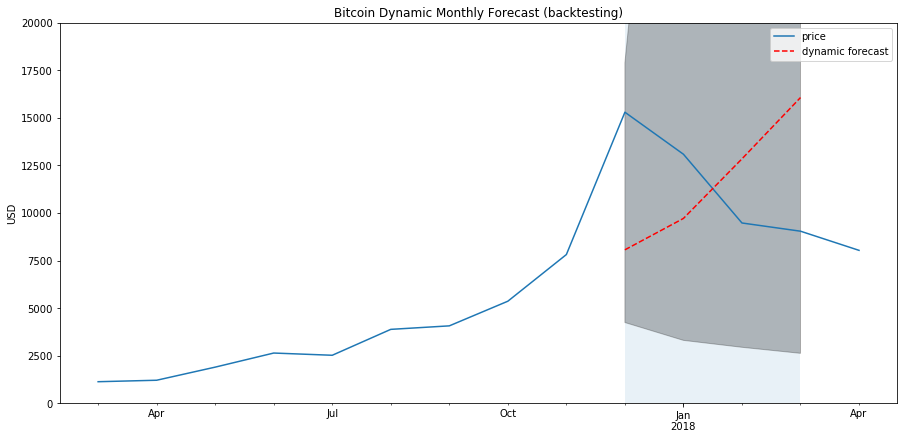

In [28]:
# Get the dynamic forecast between dates t1 and t2
t1 = pd.to_datetime('2017-12-31')
t2 = pd.to_datetime('2018-03-31')
btc_month_dynamic = best_model.get_prediction(start=t1, end=t2, dynamic=True, full_results=True)
btc_month2['dynamic_forecast'] = invboxcox(btc_month_dynamic.predicted_mean, lmbda)

# Taking 80% confidence interval because the 95% blows out too high to visualise
pred_dynamic_ci = btc_month_dynamic.conf_int(alpha=0.2)
pred_dynamic_ci['lower price_box'] = invboxcox(pred_dynamic_ci['lower price_box'], lmbda)
pred_dynamic_ci['upper price_box'] = invboxcox(pred_dynamic_ci['upper price_box'], lmbda)

# Plot
plt.figure(figsize=(15,7))
plt.ylim((0,20000))

btc_month2.price['2017-03':'2018-04'].plot(label='price')
btc_month2.dynamic_forecast.plot(color='r', ls='--', label='dynamic forecast')

plt.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
plt.fill_betweenx(plt.ylim(), t1, t2, alpha=.1, zorder=-1)
plt.legend()

plt.title('Bitcoin Dynamic Monthly Forecast (backtesting)')
plt.ylabel('USD')
plt.show()

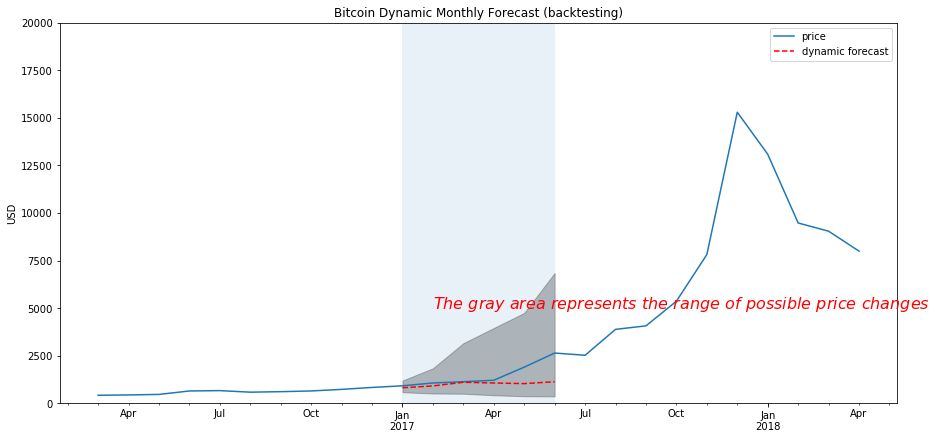

In [32]:
# Get the dynamic forecast between dates t1 and t2
t1 = pd.to_datetime('2017-01-31')
t2 = pd.to_datetime('2017-06-30')
btc_month_dynamic = best_model.get_prediction(start=t1, end=t2, dynamic=True, full_results=True)
btc_month2['dynamic_forecast'] = invboxcox(btc_month_dynamic.predicted_mean, lmbda)

# Taking 80% confidence interval because the 95% blows out too high to visualise
pred_dynamic_ci = btc_month_dynamic.conf_int(alpha=0.2)
pred_dynamic_ci['lower price_box'] = invboxcox(pred_dynamic_ci['lower price_box'], lmbda)
pred_dynamic_ci['upper price_box'] = invboxcox(pred_dynamic_ci['upper price_box'], lmbda)

# Plot
plt.figure(figsize=(15,7))
plt.ylim((0,20000))

btc_month2.price['2016-03':'2018-04'].plot(label='price')
btc_month2.dynamic_forecast.plot(color='r', ls='--', label='dynamic forecast')

plt.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
plt.fill_betweenx(plt.ylim(), t1, t2, alpha=.1, zorder=-1)

plt.text('2017-02', 5000, r'$The\ gray\ area\ represents\ the\ range\ of\ possible\ price\ changes$',
         fontdict={'size': 16, 'color': 'r'})

plt.legend()
plt.title('Bitcoin Dynamic Monthly Forecast (backtesting)')
plt.ylabel('USD')
plt.show()